TypeError: plot_gni_vs_aqi() takes 1 positional argument but 5 were given

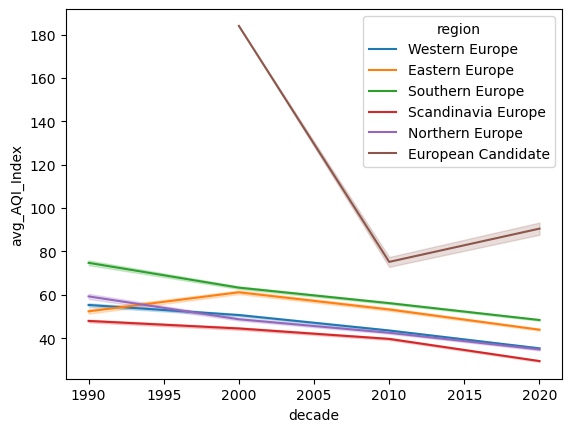

In [5]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Page configuration
st.set_page_config(page_title="Intersectional Climate Lense Open Source", layout="wide")

# Load your data
combined_data = pd.read_csv('socio_economical_agg_dataset.csv')  


def plot_gni_vs_aqi(df):
    st.sidebar.header('Filters')
    selected_region = st.sidebar.multiselect('Select Region', options=df['region'].unique(), default=df['region'].unique())
    selected_decade = st.sidebar.multiselect('Select Decade', options=df['decade'].unique(), default=df['decade'].unique())
    selected_age_group = st.sidebar.multiselect('Select Age Group', options=df['age_group'].unique(), default=df['age_group'].unique())
    selected_sex = st.sidebar.multiselect('Select Sex', options=df['sex'].unique(), default=df['sex'].unique())

    filtered_data = df[
        (df['region'].isin(selected_region)) &
        (df['decade'].isin(selected_decade)) &
        (df['age_group'].isin(selected_age_group)) &
        (df['sex'].isin(selected_sex))
    ]

    fig, ax = plt.subplots()
    sns.scatterplot(x='avg_GNI_PPP', y='avg_AQI_Index', hue='region', data=filtered_data, ax=ax)
    st.pyplot(fig)

def plot_trends_over_time(df):
    selected_metric = st.sidebar.selectbox('Select Metric', options=['avg_AQI_Index', 'avg_GNI_PPP', 'total_population'])
    st.write(f'Trends in {selected_metric} Over Time')
    
    fig, ax = plt.subplots()
    sns.lineplot(x='decade', y=selected_metric, hue='region', data=df, ax=ax)
    st.pyplot(fig)

st.title('Intersectional Climate Open Source')
st.write('Trends in Air Quality and Economic Development Over Time')
plot_trends_over_time(combined_data)


def plot_pollution_impact(df):
    selected_region = st.sidebar.selectbox('Select Region for Detailed Analysis', options=df['region'].unique())
    region_data = df[df['region'] == selected_region]

    fig, ax = plt.subplots()
    sns.barplot(x='zone_x', y='avg_air_pollutant_level', hue='age_group', data=region_data, ax=ax)
    st.pyplot(fig)


st.title('Intersectional Climate Lense Open Source')
st.write('Explore the intricate relationships between socio-economic factors and air quality.')

tab1, tab2, tab3 = st.tabs(["GNI vs AQI Analysis", "Trends Over Time", "Air Pollution Impact Analysis"])

with tab1:
    st.header("Income Group vs AQI Analysis")
    st.write("Visualize how Gross National Income correlates with Air Quality.")

    # Filters
    Selected_zone = st.sidebar.multiselect('Select zone', options=combined_data['zone'].unique())
    selected_region = st.sidebar.multiselect('Select Region', options=combined_data['region'].unique())
    Selected_country = st.sidebar.multiselect('Select Country', options=combined_data['country'].unique())
    selected_decade = st.sidebar.multiselect('Select Decade', options=combined_data['decade'].unique())

    
    # Plotting function
    plot_gni_vs_aqi(combined_data,  Selected_zone, selected_region, Selected_country, selected_decade) 

with tab2:
    st.header("Trends in Air Quality and Economic Development Over Time")
    selected_metric = st.sidebar.selectbox('Select Metric', options=['avg_AQI_Index', 'avg_GNI_Atlas' ,'avg_GNI_PPP', 'total_population'])

    # Plotting function for trends (define it similarly)
    plot_trends_over_time(combined_data, selected_metric)

with tab3:
    st.header("Differential Impact of Air Pollution")
    selected_zone = st.sidebar.selectbox('Select zone for Detailed Analysis', options=combined_data['zone'].unique())
    selected_region = st.sidebar.selectbox('Select Region for Detailed Analysis', options=combined_data['region'].unique())
    selected_country = st.sidebar.selectbox('Select country for Detailed Analysis', options=combined_data['country'].unique())
    selected_decade = st.sidebar.selectbox('Select decade for Detailed Analysis', options=combined_data['decade'].unique())
    
    # Plotting function for pollution impact (define it similarly)
    plot_pollution_impact(combined_data,  Selected_zone, selected_region, Selected_country, selected_decade) 

    
# For download
@st.cache
def convert_df_to_csv(df):
    return df.to_csv().encode('utf-8')

csv = convert_df_to_csv(filtered_data)  # filtered_data is your data after applying filters
st.download_button(label="Download data as CSV", data=csv, file_name='filtered_data.csv', mime='text/csv')

# For feedback
st.text_area("Feedback", "Enter your feedback here")
st.button("Submit")
